In [1]:
import wandb
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

entity = "jaesikyoon"
project = "agent-learning"
default_tags = ["toplot", "sparserewtype", "hardmode"]

# envs
envs = [
        [
            "targetN4C4S3S1",
            "pushN3C4S1S1",
            "oddoneoutN4C2S2S1oc",
            "oddoneoutN4C2S2S1",
        ]
]
envs = np.array(envs)

# titles
titles = [
        [
            "Object Goal Task",
            "Object Interaction Task",
            "Object Comparison Task",
            "Property Comparison Task",
        ],
        ]

# colormap
cm = plt.cm.get_cmap("tab20").colors
# models
models = {
    "GT": {
        "tags": ["gt"],
        "line_cm": cm[2],
        "range_cm": cm[3],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "Single-Vector Rep. E2E Learning": {
        "tags": ["end-to-end learning", "distributed representation"],
        "line_cm": cm[4],
        "range_cm": cm[5],
        "marker": "v",
        "fill_style": "full",
        "line_style": "dashed",
    },
    "Fixed-Region Rep. E2E Learning": {
        "tags": ["end-to-end learning", "region representation"],
        "line_cm": cm[6],
        "range_cm": cm[7],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "OCR E2E Learning": {
        "tags": ["end-to-end learning", "ocr"],
        "line_cm": cm[8],
        "range_cm": cm[9],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "Single-Vector Rep. Pretraining": {
        "tags": ["pretraining", "distributed representation"],
        "line_cm": cm[10],
        "range_cm": cm[11],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "Fixed-Region Rep. Pretraining": {
        "tags": ["pretraining", "region representation"],
        "line_cm": cm[12],
        "range_cm": cm[13],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "OCR Pretraining except IODINE": {
        "tags": ["pretraining", "ocr_except_iodine"],
        "line_cm": cm[14],
        "range_cm": cm[15],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "OCR Pretraining": {
        "tags": ["pretraining", "ocr"],
        "line_cm": cm[14],
        "range_cm": cm[15],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "SLATE": {
        "tags": ["slate"],
        "line_cm": cm[16],
        "range_cm": cm[17],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    }

}
print(f"Models: {models.keys()}")

api = wandb.Api(timeout=19)
results = {}
for i in range(envs.shape[0]):
    for j in range(envs.shape[1]):
        print(envs[i, j])
        for model_name, model_infos in models.items():
            filters = []
            filters.append({"tags": envs[i,j]})
            for model_tag in model_infos["tags"]:
                filters.append({"tags": model_tag})
            for default_tag in default_tags:
                filters.append({"tags": default_tag})
            print(filters)
            if not model_name in results.keys():
                results[model_name] = {}
            runs = api.runs(f"{entity}/{project}", filters={"$and": filters})
            global_steps = []
            wall_times = []
            success_rates = []
            for run in runs:
                #print(run)
                history = run.scan_history(["global_step","_timestamp","eval/success_rate"])
                _global_step = []
                _wall_times = []
                _success_rate = []
                for row in history:
                    _global_step.append(row["global_step"])
                    _wall_times.append(row["_timestamp"])
                    _success_rate.append(row["eval/success_rate"])
                global_steps.append(_global_step)
                wall_times.append(_wall_times)
                success_rates.append(_success_rate)
            if model_name == "OCR Pretraining" and (envs[i,j] == "pushN3C4S1S1" or envs[i,j] == "oddoneoutN4C2S2S1oc"):
                runs = api.runs(f"jaesikyoon/ocrl-rl", filters={"$and": filters})
                for run in runs:
                    #print(run)
                    history = run.scan_history(["global_step","_timestamp","eval/success_rate"])
                    _global_step = []
                    _wall_times = []
                    _success_rate = []
                    for row in history:
                        _global_step.append(row["global_step"])
                        _wall_times.append(row["_timestamp"])
                        _success_rate.append(row["eval/success_rate"])
                    global_steps.append(_global_step)
                    wall_times.append(_wall_times)
                    success_rates.append(_success_rate)
            if len(global_steps) == 0:  # no logs
                continue
            step = 2000000 // 4000 # plotting to 2000000 steps
            min_step_idx = 100
            min_step = 2000000
            # success rates
            for rate_idx in range(len(success_rates)):
                success_rates[rate_idx] = success_rates[rate_idx][:step]
                if min_step > len(success_rates[rate_idx]):
                    min_step_idx = rate_idx
                    min_step = len(success_rates[rate_idx])
            sr_steps = global_steps[min_step_idx][:min_step]
            sr_wall_times = [wall_time[:min_step] for wall_time in wall_times][-1]
            success_rates = [success_rate[:min_step] for success_rate in success_rates]
            sr_mean = np.mean(success_rates, axis=0)
            sr_std = np.std(success_rates, axis=0)
            results[model_name][envs[i,j]] = {
                "step": sr_steps,
                "walltime": sr_wall_times,
                "mean": sr_mean,
                "std": sr_std
            }

Models: dict_keys(['GT', 'Single-Vector Rep. E2E Learning', 'Fixed-Region Rep. E2E Learning', 'OCR E2E Learning', 'Single-Vector Rep. Pretraining', 'Fixed-Region Rep. Pretraining', 'OCR Pretraining except IODINE', 'OCR Pretraining', 'SLATE'])
targetN4C4S3S1
[{'tags': 'targetN4C4S3S1'}, {'tags': 'gt'}, {'tags': 'toplot'}, {'tags': 'sparserewtype'}, {'tags': 'hardmode'}]
[{'tags': 'targetN4C4S3S1'}, {'tags': 'end-to-end learning'}, {'tags': 'distributed representation'}, {'tags': 'toplot'}, {'tags': 'sparserewtype'}, {'tags': 'hardmode'}]
[{'tags': 'targetN4C4S3S1'}, {'tags': 'end-to-end learning'}, {'tags': 'region representation'}, {'tags': 'toplot'}, {'tags': 'sparserewtype'}, {'tags': 'hardmode'}]
[{'tags': 'targetN4C4S3S1'}, {'tags': 'end-to-end learning'}, {'tags': 'ocr'}, {'tags': 'toplot'}, {'tags': 'sparserewtype'}, {'tags': 'hardmode'}]
[{'tags': 'targetN4C4S3S1'}, {'tags': 'pretraining'}, {'tags': 'distributed representation'}, {'tags': 'toplot'}, {'tags': 'sparserewtype'}, {'

In [3]:
import json
with open("results/regime_wise_globalstep_wallclocktime.json", "w") as f:
    json.dump(results, f)

{'GT': {'targetN4C4S3S1': {'step': [4000, 8000, 12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 44000, 48000, 52000, 56000, 60000, 64000, 68000, 72000, 76000, 80000, 84000, 88000, 92000, 96000, 100000, 104000, 108000, 112000, 116000, 120000, 124000, 128000, 132000, 136000, 140000, 144000, 148000, 152000, 156000, 160000, 164000, 168000, 172000, 176000, 180000, 184000, 188000, 192000, 196000, 200000, 204000, 208000, 212000, 216000, 220000, 224000, 228000, 232000, 236000, 240000, 244000, 248000, 252000, 256000, 260000, 264000, 268000, 272000, 276000, 280000, 284000, 288000, 292000, 296000, 300000, 304000, 308000, 312000, 316000, 320000, 324000, 328000, 332000, 336000, 340000, 344000, 348000, 352000, 356000, 360000, 364000, 368000, 372000, 376000, 380000, 384000, 388000, 392000, 396000, 400000, 404000, 408000, 412000, 416000, 420000, 424000, 428000, 432000, 436000, 440000, 444000, 448000, 452000, 456000, 460000, 464000, 468000, 472000, 476000, 480000, 484000, 488000, 492000, 496000

TypeError: Object of type ndarray is not JSON serializable

targetN4C4S3S1
targetN4C4S3S1
pushN3C4S1S1
pushN3C4S1S1
oddoneoutN4C2S2S1oc
oddoneoutN4C2S2S1oc
oddoneoutN4C2S2S1
oddoneoutN4C2S2S1


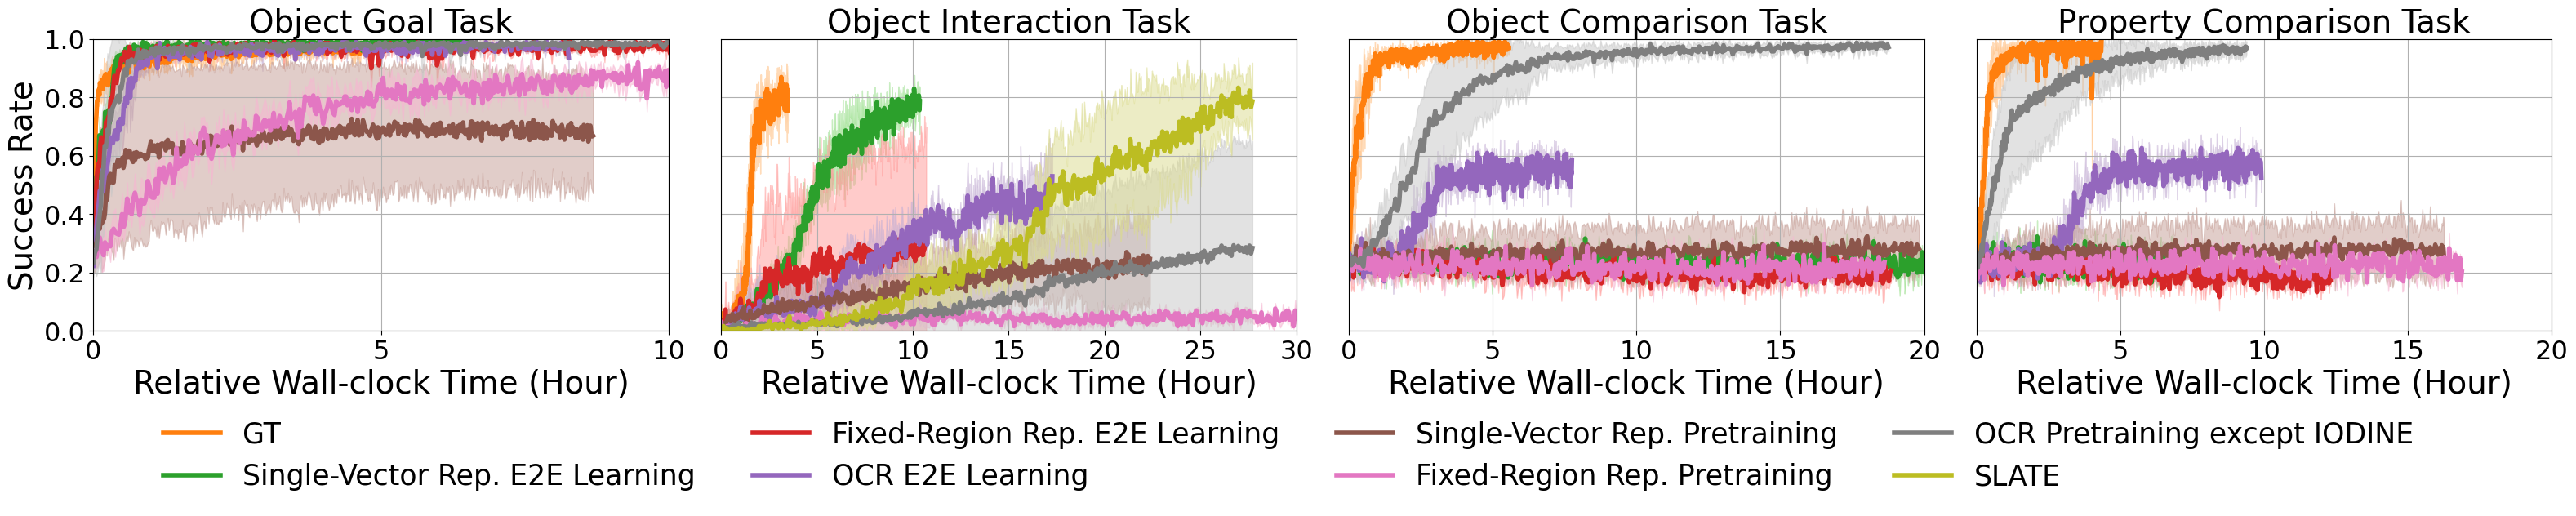

In [14]:
# plots
top = 0.09
hspace = 0.07
bottom = 0.26 if envs.shape[0] != 1 else 0.36
height = (1 - top - bottom - hspace * (envs.shape[0] - 1)) / envs.shape[0]
left = 0.04
wspace = 0.02
#wspace = 0.07
right = 0.019
width = (1 - left - right - wspace * (envs.shape[1] - 1)) / envs.shape[1]
recs = np.zeros(envs.shape, dtype=object)
for i in range(recs.shape[0]):
    for j in range(recs.shape[1]):
        recs[i, j] = [
            left + j * (width + wspace),  # left
            bottom + (recs.shape[0] - 1 - i) * (height + hspace),  # bottom
            width,
            height,
        ]
plt.figure(figsize=(8 * recs.shape[1], 6.5 * recs.shape[0]))

for i in range(envs.shape[0]):
    for j in range(envs.shape[1]):
        print(envs[i, j])
        ax = plt.axes(recs[i, j])
        for model_name, model_infos in models.items():
            if model_name == "OCR Pretraining":
                continue
            if model_name == "SLATE" and (envs[i,j]!="pushN3C4S1S1"):
                continue
            sr_steps = results[model_name][envs[i,j]]["walltime"]
            sr_mean = results[model_name][envs[i,j]]["mean"]
            sr_std = results[model_name][envs[i,j]]["std"]
            sr_steps = np.array(sr_steps) / 60 / 60
            sr_steps -= sr_steps[0]
            (line,) = ax.plot(
                sr_steps,
                sr_mean,
                color=model_infos["line_cm"] if model_name != "SLATE" else cm[16],
                label=model_name,
                linewidth=4,
            )
            plt.fill_between(
                #global_steps[0][:min_steps],
                sr_steps,
                sr_mean - sr_std,
                sr_mean + sr_std,
                color=model_infos["range_cm"] if model_name != "SLATE" else cm[17],
                alpha=0.5,
            )
            models[model_name]["line"] = line
        ax.grid(True)
        ax.xaxis.offsetText.set_fontsize(22)
        axes = plt.gca()
        ax.set_ylim([0.0, 1.0])
        print(envs[i,j])
        if envs[i, j] == "targetN4C4S3S1":
            ax.set_xlim([0.0, 10])
        elif envs[i, j] == "pushN3C4S1S1":
            ax.set_xlim([0.0, 30])
        else:
            ax.set_xlim([0.0, 20])
        plt.yticks(fontsize=23)
        if j == 0:
            ax.set_ylabel("Success Rate", fontsize=28)
        else:
            ax.yaxis.set_ticklabels([])
            ax.yaxis.set_ticks_position("none")
        if i == envs.shape[0] - 1:
            plt.xticks(fontsize=23)
            if envs[i, j] == "targetN4C4S3S1":
                plt.xticks([0, 5, 10], fontsize=23)
            elif envs[i, j] == "pushN3C4S1S1":
                plt.xticks([0, 5, 10, 15, 20, 25, 30], fontsize=23)
            else:
                plt.xticks([0, 5, 10, 15, 20], fontsize=23)
            ax.set_xlabel("Relative Wall-clock Time (Hour)", fontsize=28) 
        else:
            ax.xaxis.set_ticklabels([])
            ax.xaxis.set_ticks_position("none")
        ax.set_title(titles[i][j], fontsize=28)

legended = []
for key in models.keys():
    if key == "OCR Pretraining":
        continue
    if "line" in models[key].keys():
        legended.append(models[key]["line"])
plt.figlegend(
    loc="lower center",
    #ncol=len(models.keys())//3,
    ncol=4,
    fontsize=25,
    #fontsize=23,
    frameon=False,
    handles=legended,
)            
img_name = "icml_plot_overall_walltime_" + datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")
plt.savefig(img_name + ".png", dpi=50)  

targetN4C4S3S1
targetN4C4S3S1
pushN3C4S1S1
pushN3C4S1S1
oddoneoutN4C2S2S1oc
oddoneoutN4C2S2S1oc
oddoneoutN4C2S2S1
oddoneoutN4C2S2S1


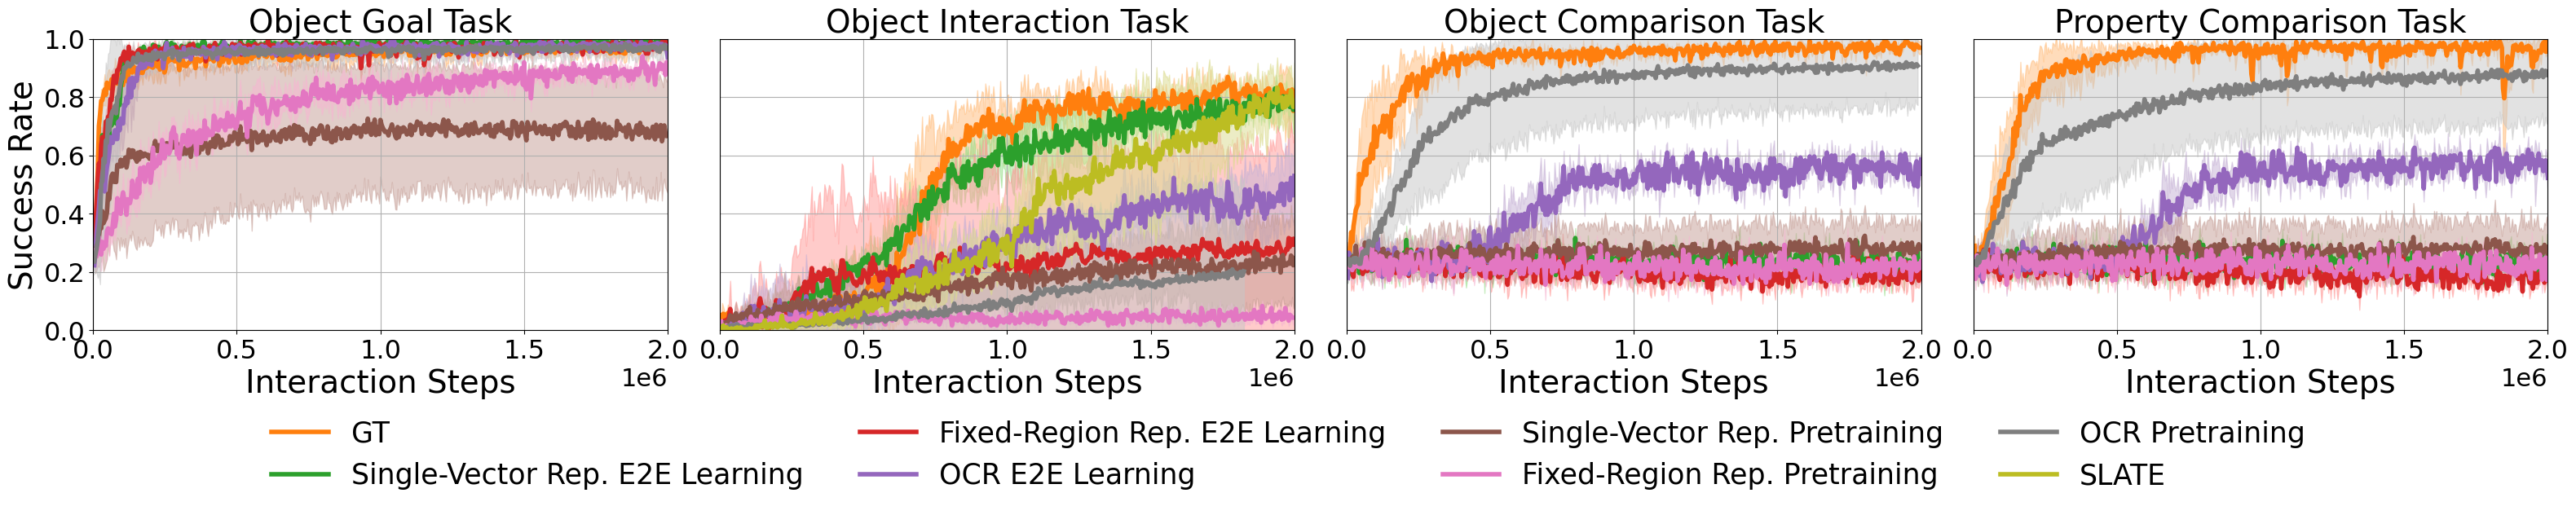

In [11]:
# plots
top = 0.09
hspace = 0.07
bottom = 0.26 if envs.shape[0] != 1 else 0.36
height = (1 - top - bottom - hspace * (envs.shape[0] - 1)) / envs.shape[0]
left = 0.04
wspace = 0.02
#wspace = 0.07
right = 0.019
width = (1 - left - right - wspace * (envs.shape[1] - 1)) / envs.shape[1]
recs = np.zeros(envs.shape, dtype=object)
for i in range(recs.shape[0]):
    for j in range(recs.shape[1]):
        recs[i, j] = [
            left + j * (width + wspace),  # left
            bottom + (recs.shape[0] - 1 - i) * (height + hspace),  # bottom
            width,
            height,
        ]
plt.figure(figsize=(8 * recs.shape[1], 6.5 * recs.shape[0]))

for i in range(envs.shape[0]):
    for j in range(envs.shape[1]):
        print(envs[i, j])
        ax = plt.axes(recs[i, j])
        for model_name, model_infos in models.items():
            if model_name == "OCR Pretraining except IODINE":
                continue
            if model_name == "SLATE" and (envs[i,j]!="pushN3C4S1S1"):
                continue
            sr_steps = results[model_name][envs[i,j]]["step"]
            sr_mean = results[model_name][envs[i,j]]["mean"]
            sr_std = results[model_name][envs[i,j]]["std"]
            (line,) = ax.plot(
                sr_steps,
                sr_mean,
                color=model_infos["line_cm"] if model_name != "SLATE" else cm[16],
                label=model_name,
                linewidth=4,
            )
            plt.fill_between(
                sr_steps,
                sr_mean - sr_std,
                sr_mean + sr_std,
                color=model_infos["range_cm"] if model_name != "SLATE" else cm[17],
                alpha=0.5,
            )
            models[model_name]["line"] = line
        ax.grid(True)
        ax.xaxis.offsetText.set_fontsize(22)
        axes = plt.gca()
        ax.set_ylim([0.0, 1.0])
        print(envs[i,j])
        ax.set_xlim([0.0, 2e6])
        plt.yticks(fontsize=23)
        if j == 0:
            ax.set_ylabel("Success Rate", fontsize=28)
        else:
            ax.yaxis.set_ticklabels([])
            ax.yaxis.set_ticks_position("none")
        if i == envs.shape[0] - 1:
            plt.xticks([0, 500000, 1000000, 1500000, 2000000], fontsize=23)
            ax.set_xlabel("Interaction Steps", fontsize=28) 
        else:
            ax.xaxis.set_ticklabels([])
            ax.xaxis.set_ticks_position("none")
        ax.set_title(titles[i][j], fontsize=28)

legended = []
for key in models.keys():
    if key == "OCR Pretraining except IODINE":
        continue
    if "line" in models[key].keys():
        legended.append(models[key]["line"])
plt.figlegend(
    loc="lower center",
    #ncol=len(models.keys())//3,
    ncol=4,
    fontsize=25,
    #fontsize=23,
    frameon=False,
    handles=legended,
)       
img_name = "icml_plot_overall_globalstep_" + datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")
plt.savefig(img_name + ".png", dpi=50)     